In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,61777,None,None,86085.715275
2020-06-13,61778,None,None,79940.811469
2020-06-14,61779,None,None,74244.112992
2020-06-15,61780,None,None,68878.187593
2020-06-16,61781,None,None,64137.552455
...,...,...,...,...
2021-05-24,62123,None,None,43946.168807
2021-05-25,62124,None,None,44767.032201
2021-05-26,62125,None,None,45782.637130


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-28_2021-05-28-17-15.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-27_2021-05-27-17-07.pickle


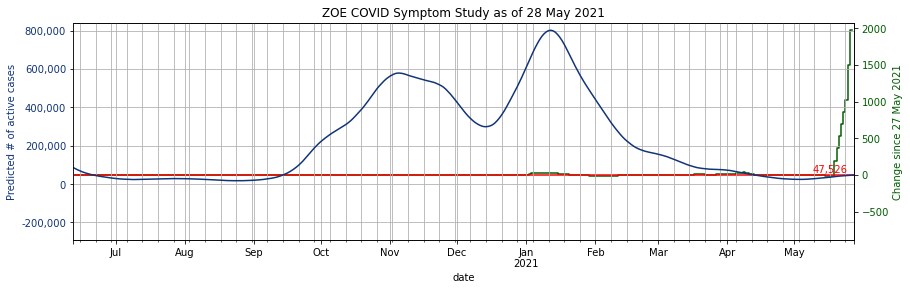

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

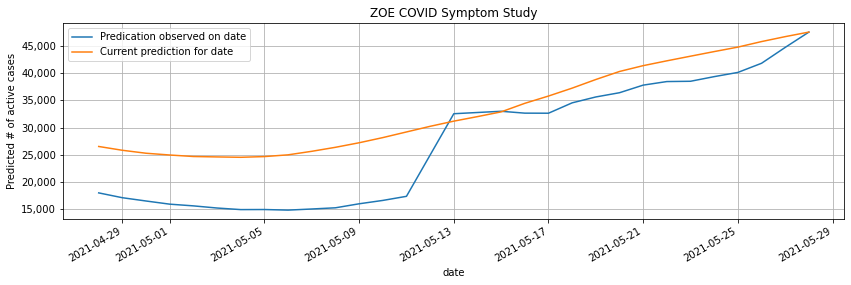

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-05-28_2021-05-28-17-15.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
272,Tameside,E08000008,1.140422
324,East Dunbartonshire,S12000045,0.748899
24,Leicester,E06000016,0.659918
267,Bury,E08000002,0.618993
373,North Ayrshire,S12000021,0.555934
182,West Lancashire,E07000127,0.522246
323,North Lanarkshire,S12000044,0.512713
147,Gloucester,E07000081,0.483483
266,Bolton,E08000001,0.436541
239,Leeds,E08000035,0.410176
